<a href="https://colab.research.google.com/github/SnehaDharne/OcularDiseaseRecognition/blob/main/odir_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
data_dir_resized = "/content/drive/MyDrive/archive/ODIR-5K/ODIR-5K/resized"


In [ ]:
path_for_saving = "/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K"

In [ ]:
img_path = os.path.join(data_dir_resized,os.path.basename('0_left.jpg'))
img = cv2.imread(img_path)

In [ ]:
img_dir = data_dir_resized
img_dir_dst = '/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/clahe+msr'
# Loop through the images in the directory

left_files = []
for filename in os.listdir(img_dir):
    dst_path = os.path.join(img_dir_dst, filename)
    if not os.path.exists(dst_path):
      left_files.append(filename)

In [ ]:
path_for_saving = '/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/clahe+msr'

In [ ]:
left_files

[]

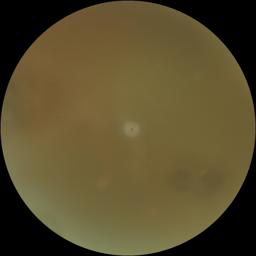

In [ ]:
import PIL
import PIL.Image
PIL.Image.open(str(img_path))

Cropped black Pixels

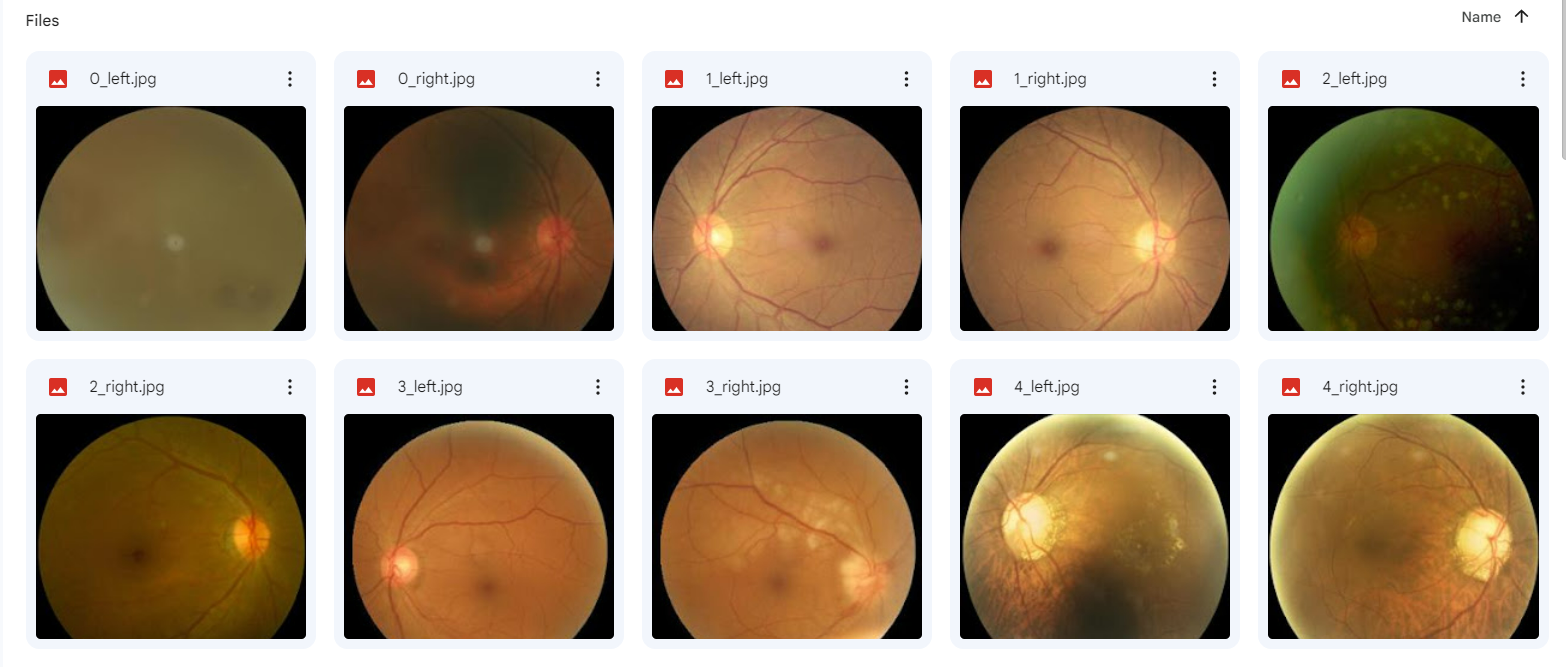

RGB CLAHE

In [ ]:
sample_images = ['0_left.jpg', '0_right.jpg', '1_left.jpg', '1_right.jpg', '2_left.jpg','2_right.jpg','3_left.jpg','3_right.jpg','4_left.jpg','4_right.jpg']

for image in sample_images:
  img_path = os.path.join(data_dir_resized,os.path.basename(image))
  img = cv2.imread(img_path)
  b, g, r = cv2.split(img)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  g_clahe = clahe.apply(g)
  img_clahe = cv2.merge((clahe.apply(b), g_clahe, clahe.apply(r)))
  cv2.imwrite(os.path.join(path_for_saving, "clahe_" + image), img_clahe)



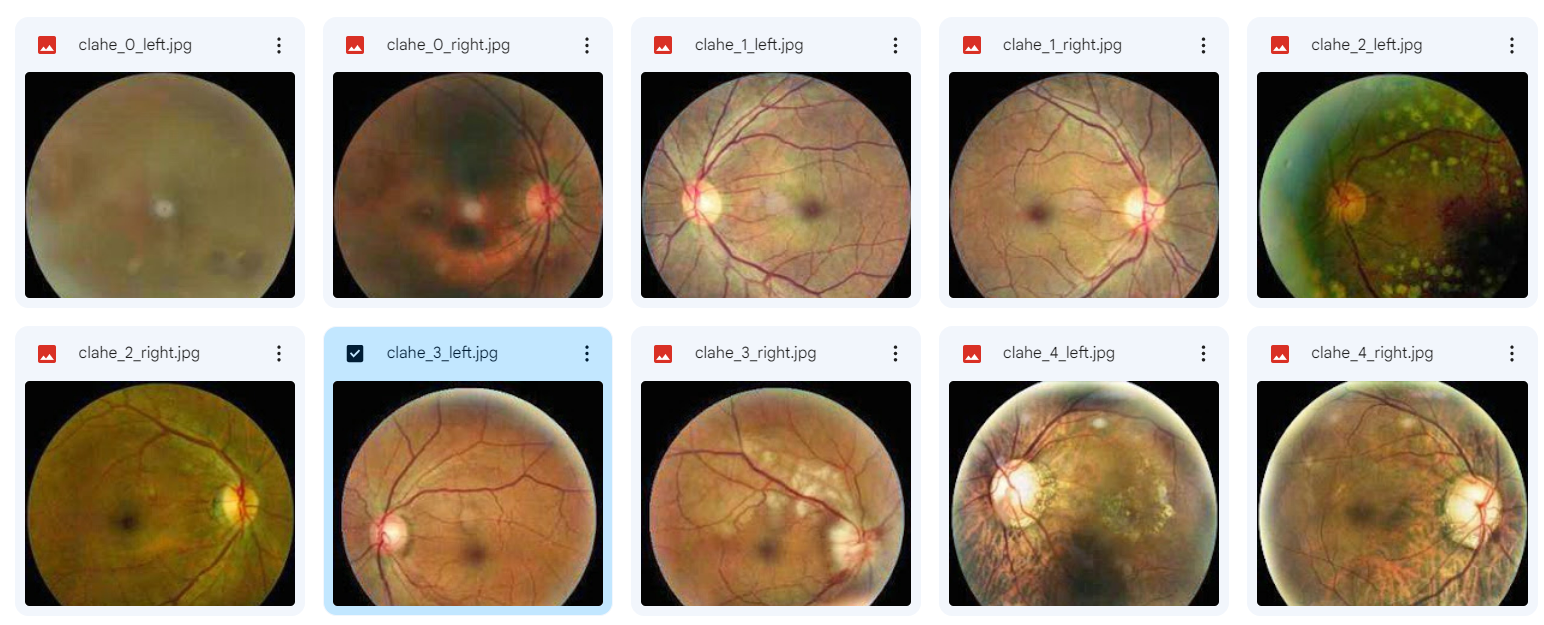

GREEN CLAHE

In [ ]:
###only green clahe
sample_images = ['0_left.jpg', '0_right.jpg', '1_left.jpg', '1_right.jpg', '2_left.jpg','2_right.jpg','3_left.jpg','3_right.jpg','4_left.jpg','4_right.jpg','5_left.jpg','5_right.jpg',]

for image in sample_images:
  img_path = os.path.join(data_dir_resized,os.path.basename(image))
  img = cv2.imread(img_path)
  b, g, r = cv2.split(img)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  g_clahe = clahe.apply(g)
  img_clahe = cv2.merge((b,g_clahe,r))
  # img_clahe = cv2.merge((clahe.apply(b), g_clahe, clahe.apply(r)))
  cv2.imwrite(os.path.join(path_for_saving, "g_clahe_" + image), img_clahe)

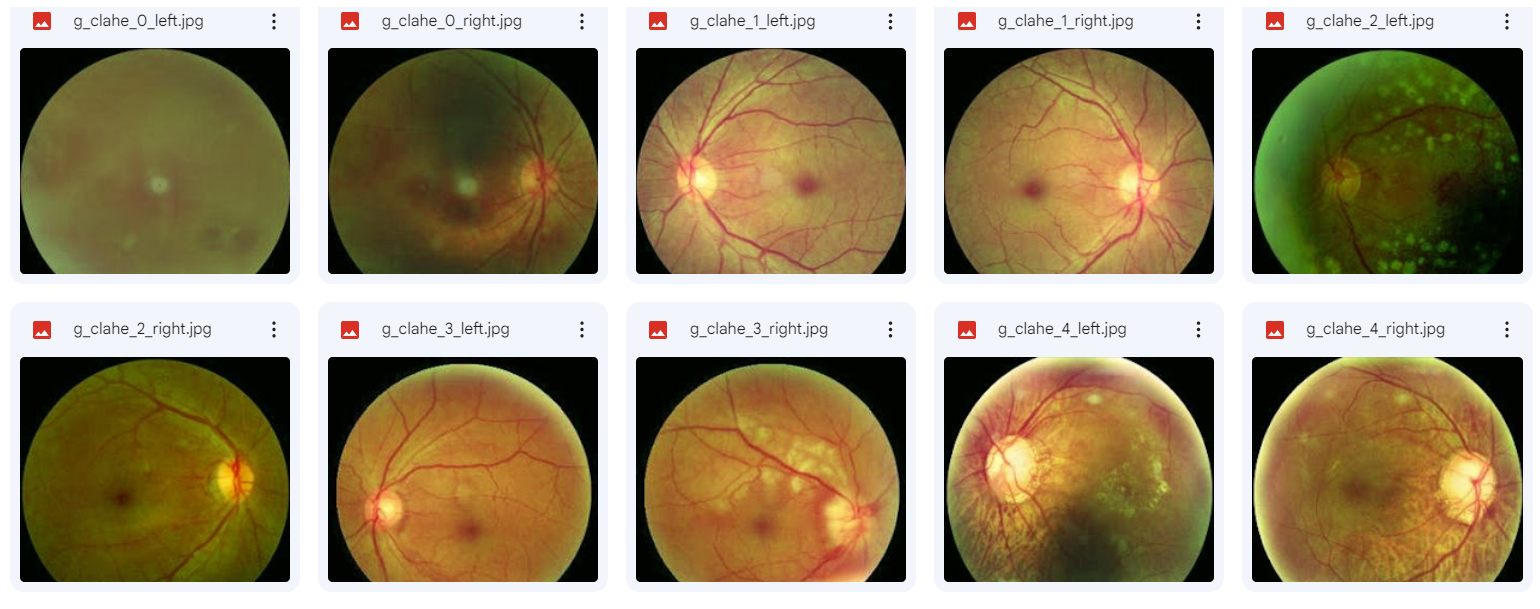

In [ ]:
import cv2
import numpy as np

# def apply_msr_gaussian(image):
#     # Convert image to LAB color space
#     lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
#     # Split channels
#     l, a, b = cv2.split(lab)
#     # Apply MSR enhancement
#     scales = [5, 35, 150]
#     weight = [1, 1, 1]
#     msr = np.zeros_like(l)
#     for i in range(len(scales)):
#         msr += weight[i] * np.log10(l) - np.log10(cv2.GaussianBlur(l, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))
#     msr = np.exp(msr/sum(weight))
#     msr = msr.astype(np.uint8)
#     msr = cv2.normalize(msr, None, 0, 255, cv2.NORM_MINMAX)
#     msr = cv2.convertScaleAbs(msr)
#     # Apply Gaussian filter
#     gaussian = cv2.GaussianBlur(msr, (0, 0), sigmaX=10, sigmaY=10, borderType=cv2.BORDER_DEFAULT)
#     # Merge channels
#     enhanced_lab = cv2.merge((gaussian, a, b))
#     # Convert back to RGB color space
#     enhanced = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2BGR)
#     return enhanced

def apply_msr_gaussian(image):
    scales = [5, 35, 150]
    weight = [1,1,1]
    b, g, r = cv2.split(image)
    msr = np.zeros_like(b, dtype=np.float32)
    for i in range(len(scales)):
        msr += weight[i] * np.log10(b) - np.log10(cv2.GaussianBlur(b, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))
        msr += weight[i] * np.log10(g) - np.log10(cv2.GaussianBlur(g, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))
        msr += weight[i] * np.log10(r) - np.log10(cv2.GaussianBlur(r, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))
    msr = np.exp(msr/sum(weight))
    msr = cv2.normalize(msr, None, 0, 255, cv2.NORM_MINMAX)
    msr = msr.astype(np.uint8)
    return cv2.merge((msr, msr, msr))

In [ ]:
####use to preprocess all the images
####not executed yet
# Define the path to your image directory
img_dir = data_dir_resized
img_dir_dst = '/content/drive/MyDrive/ODIR-dataset/archive/ODIR-5K/ODIR-5K/clahe+msr'
# Loop through the images in the directory

left_files = []
for filename in os.listdir(img_dir):
  if "_left.jpg" in filename:
    dst_path = os.path.join(img_dir_dst, filename)
    if not os.path.exists(dst_path):
      left_files.append(filename)

for filename in left_files:
    # Load the image
    img_path = os.path.join(img_dir, filename)
    img = cv2.imread(img_path)

    # Split the image into green and RGB channels
    b, g, r = cv2.split(img)

    # Apply CLAHE on the green channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    g_clahe = clahe.apply(g)

    # Apply CLAHE on the RGB channels
    img_clahe = cv2.merge((clahe.apply(b), g_clahe, clahe.apply(r)))

    enhanced = apply_msr_gaussian(img_clahe)

    # Save the enhanced image
    cv2.imwrite(os.path.join(img_dir_dst, filename), enhanced)

<ipython-input-4-a2fc01e932cf>:33: RuntimeWarning: divide by zero encountered in log10
  msr += weight[i] * np.log10(b) - np.log10(cv2.GaussianBlur(b, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))
<ipython-input-4-a2fc01e932cf>:35: RuntimeWarning: divide by zero encountered in log10
  msr += weight[i] * np.log10(r) - np.log10(cv2.GaussianBlur(r, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))


In [ ]:
sample_images = ['clahe_0_left.jpg', 'clahe_0_right.jpg', 'clahe_1_left.jpg', 'clahe_1_right.jpg', 'clahe_2_left.jpg','clahe_2_right.jpg','clahe_3_left.jpg','clahe_3_right.jpg','clahe_4_left.jpg','clahe_4_right.jpg']
for image in sample_images:
  img_path = os.path.join(path_for_saving,os.path.basename(image))
  img = cv2.imread(img_path)
  enhanced = apply_msr_gaussian(img)
  img_name = os.path.basename(img_path)
  enhanced_path = os.path.join(path_for_saving, "msr_g_" + img_name)
  cv2.imwrite(enhanced_path, enhanced)



<ipython-input-13-a2fc01e932cf>:33: RuntimeWarning: divide by zero encountered in log10
  msr += weight[i] * np.log10(b) - np.log10(cv2.GaussianBlur(b, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))
<ipython-input-13-a2fc01e932cf>:34: RuntimeWarning: divide by zero encountered in log10
  msr += weight[i] * np.log10(g) - np.log10(cv2.GaussianBlur(g, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))
<ipython-input-13-a2fc01e932cf>:35: RuntimeWarning: divide by zero encountered in log10
  msr += weight[i] * np.log10(r) - np.log10(cv2.GaussianBlur(r, (0, 0), sigmaX=scales[i], sigmaY=scales[i], borderType=cv2.BORDER_DEFAULT))


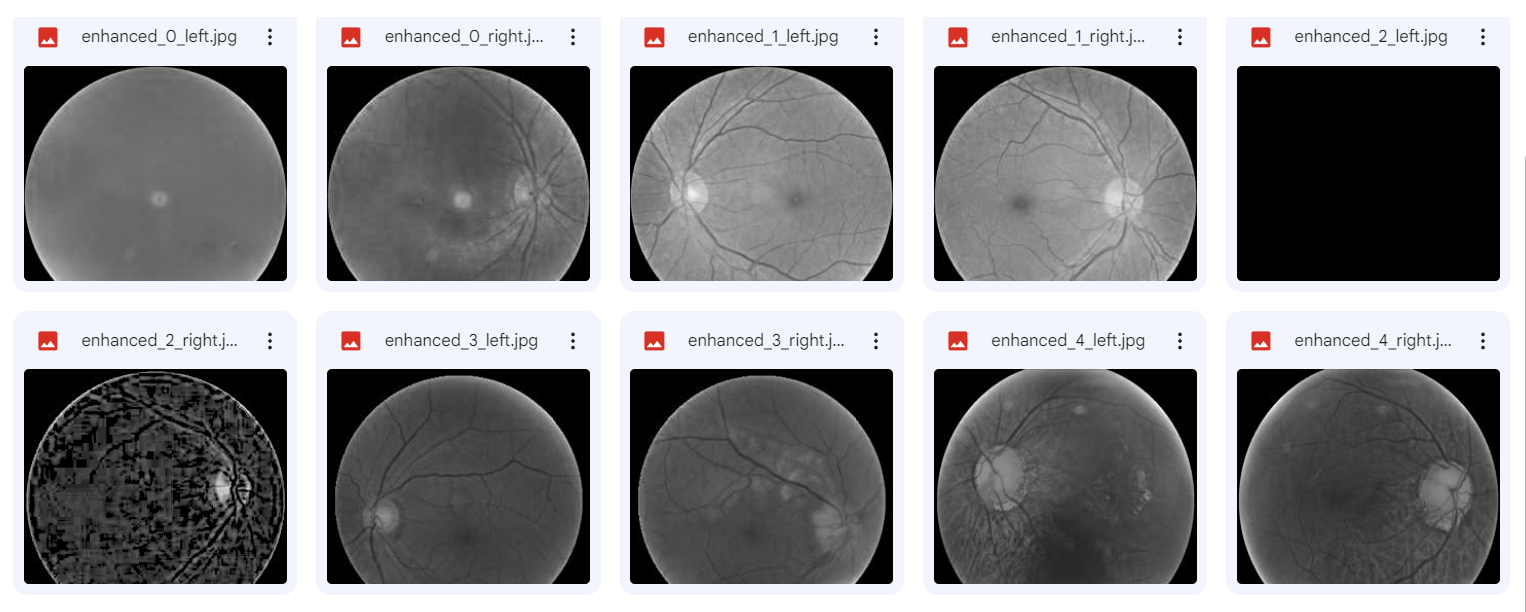

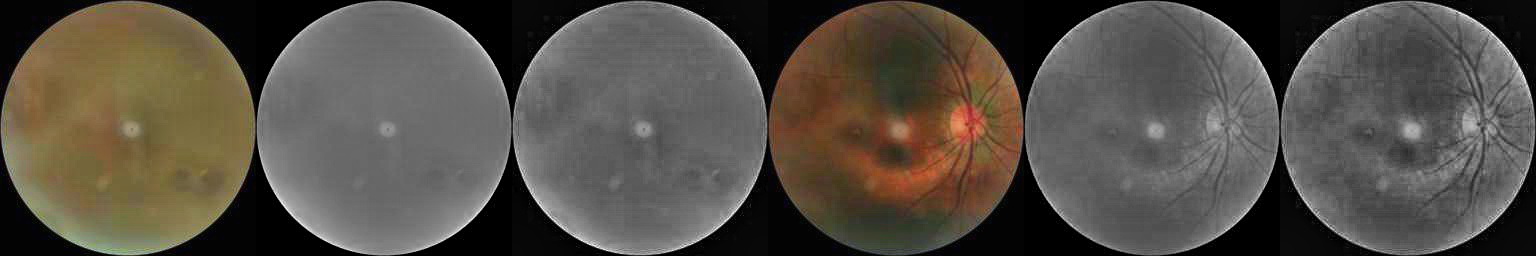

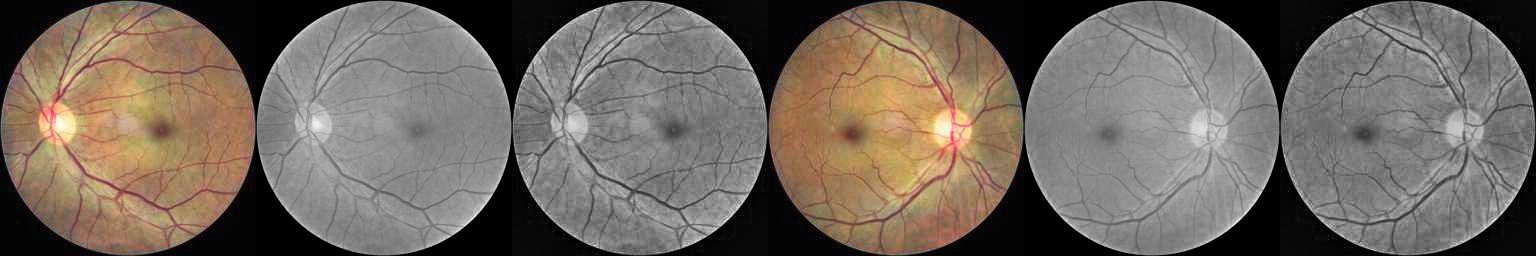

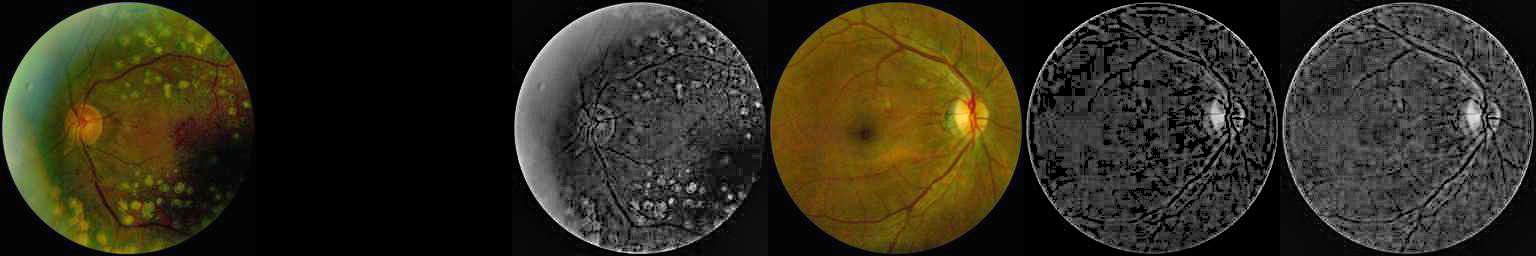

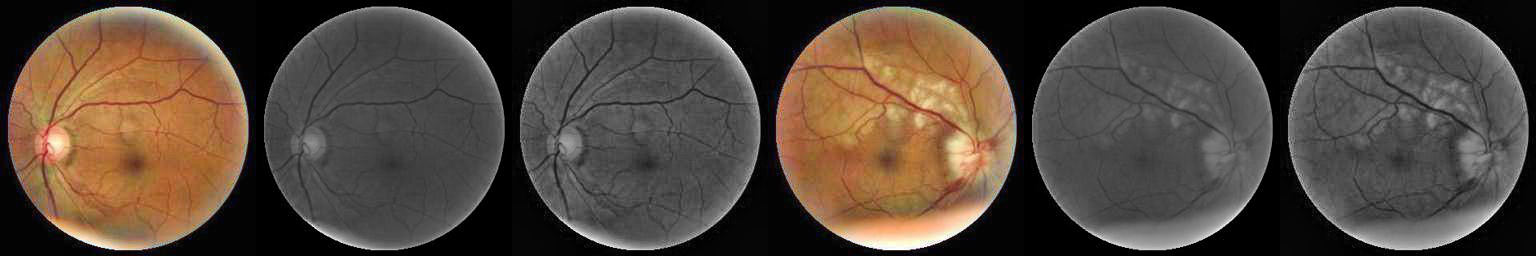

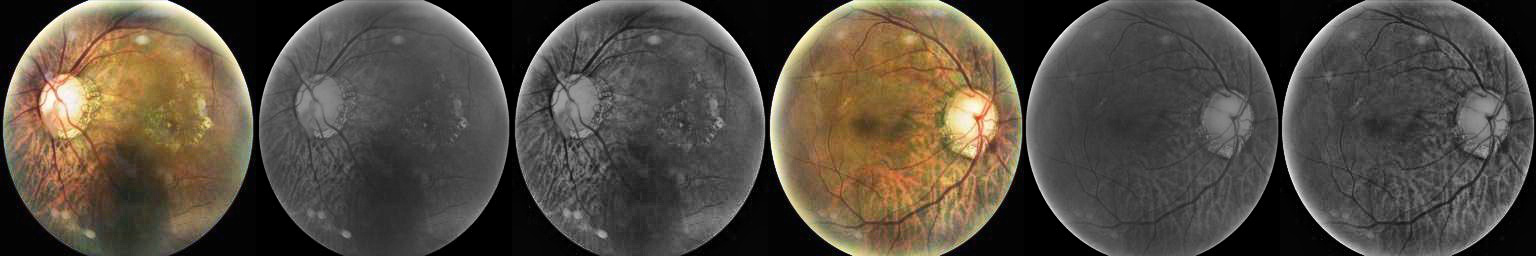

In [ ]:
for i in range(5):
  path1 = os.path.join(path_for_saving, os.path.basename('clahe_' + str(i) + '_left.jpg'))
  path2 = os.path.join(path_for_saving, os.path.basename('enhanced_' + str(i) + '_left.jpg'))
  path3 = os.path.join(path_for_saving, os.path.basename('msr_g_clahe_' + str(i) + '_left.jpg'))
  path4 = os.path.join(path_for_saving, os.path.basename('clahe_' + str(i) + '_right.jpg'))
  path5 = os.path.join(path_for_saving, os.path.basename('enhanced_' + str(i) + '_right.jpg'))
  path6 = os.path.join(path_for_saving, os.path.basename('msr_g_clahe_' + str(i) + '_right.jpg'))

  images = [Image.open(x) for x in [path1, path2, path3, path4, path5, path6]]
  widths, heights = zip(*(i.size for i in images))

  total_width = sum(widths)
  max_height = max(heights)

  new_im = Image.new('RGB', (total_width, max_height))

  x_offset = 0

  for img in images:
    new_im.paste(img, (x_offset,0))
    x_offset += img.size[0]

  new_im.save('fundus1.jpg')
  new_im.show('fundus1.jpg')




In [ ]:
# import cv2
# import numpy as np
# import math
# from google.colab.patches import cv2_imshow
# def MSR_retinex(img):
#     alpha = 4
#     beta = -4
#     sigma = 10
#     gamma = 128
#     scales = [5, 35, 150]
#     weight = [1, 1, 1]

#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.astype('float32') + 1.0
#     img_log = np.log10(img)
#     img_msr = np.zeros_like(img)

#     for i in range(len(scales)):
#         sigma_i = math.sqrt(scales[i]**2 - 1)
#         blur = cv2.GaussianBlur(img_log, (0,0), sigmaX=sigma_i, sigmaY=sigma_i)
#         img_msr += weight[i] * (img_log - blur)

#     img_msr = alpha * img_msr + beta
#     img_msr = (img_msr - np.min(img_msr)) / (np.max(img_msr) - np.min(img_msr)) * gamma
#     img_msr = img_msr.astype('uint8')

#     return cv2.cvtColor(img_msr, cv2.COLOR_RGB2BGR)

# # Load the input image
# img_path = os.path.join(data_dir_resized,'0_right.jpg')
# img = cv2.imread(img_path)

# # Apply MSR retinex function
# output = MSR_retinex(img)

# # Display the output image
# cv2.imwrite(os.path.join(path_for_saving, "msr_" + image), output)


True

stack RGB CLAHE with MSR Gaussian  

In [ ]:
! pip install huggingface_hub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing

In [ ]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

config.json not found in HuggingFace Hub.


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
right_files = []
img_dir ='/content/drive/MyDrive/archive/ODIR-5K/ODIR-5K/resized'
img_dir_dst = '/content/drive/MyDrive/ODIR-5K/clahe+mirnet'
for filename in os.listdir(img_dir):
  if "_right.jpg" in filename:
    filename1 = 'clahe_mirnet_'+filename
    dst_path = os.path.join(img_dir_dst, filename1)
    if not os.path.exists(dst_path):
      right_files.append(filename)

In [ ]:
right_files[0]

'537_right.jpg'

In [ ]:

for filename in right_files:
    # Load the image
    img_path = os.path.join(img_dir, filename)
    img = cv2.imread(img_path)
    b, g, r = cv2.split(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    g_clahe = clahe.apply(g)
    img_clahe = cv2.merge((clahe.apply(b), g_clahe, clahe.apply(r)))

    # Apply MIRNet
    low_light_img = Image.fromarray(cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB))
    low_light_img = low_light_img.resize((256, 256), Image.NEAREST)
    image = np.array(low_light_img).astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)

    # Apply your MIRNet model
    output_image = model.predict(image)  # Replace 'model' with your MIRNet model

    # Post-process the output image
    output_image = np.squeeze(output_image) * 255.0
    output_image = np.clip(output_image, 0, 255).astype(np.uint8)
    output_image = Image.fromarray(output_image)  # Convert back to PIL Image

    file_name = "clahe_mirnet_" + filename
    path = os.path.join(img_dir_dst, file_name)
    output_image.save(path)

1/1 [==============================] - 16s 16s/step


In [ ]:
pip install huggingface_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing

In [ ]:
import cv2
import numpy as np
from skimage import exposure
from skimage.color import rgb2lab
from skimage.measure import label, regionprops

# Step 1: Convert unprocessed fundus images to L + a + b -
def convert_to_lab(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab_image)
    inverted_b = 255 - b
    return cv2.merge([l, a, inverted_b])

# Step 2: Apply CLAHE on the lightness channel
def apply_clahe(image):
    lab_image = rgb2lab(image)
    l, a, b = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_l = clahe.apply(l)
    return cv2.merge([clahe_l, a, b])

# Step 3: Convert to RGB colorspace
def convert_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_LAB2RGB)

# Step 4: Load the stored RetinaNet model weights
def load_retinanet_model():
    # Code to load the trained RetinaNet model
    pass

# Step 5: Generate vessel mask using the loaded RetinaNet model weights
def generate_vessel_mask(image, model):
    # Code to generate vessel mask using the RetinaNet model
    pass

# Step 6: Mask regions with area less than 100 pixels
def mask_regions(mask, threshold=100):
    labeled_image = label(mask)
    props = regionprops(labeled_image)

    for prop in props:
        if prop.area < threshold:
            minr, minc, maxr, maxc = prop.bbox
            mask[minr:maxr, minc:maxc] = 0

    return mask

# Step 7: Save the generated mask image
def save_mask_image(mask, filename):
    cv2.imwrite(filename, mask)

# Main function
def main():
    # Assuming you have a list of unprocessed fundus images stored in 'unprocessed_images'
    unprocessed_images = [...]

    # Step 4: Load the stored RetinaNet model weights
    model = load_retinanet_model()

    for i, unprocessed_image in enumerate(unprocessed_images):
        # Step 1: Convert unprocessed fundus images to L + a + b -
        lab_image = convert_to_lab(unprocessed_image)

        # Step 2: Apply CLAHE on the lightness channel
        enhanced_image = apply_clahe(lab_image)

        # Step 3: Convert to RGB colorspace
        rgb_image = convert_to_rgb(enhanced_image)

        # Step 5: Generate vessel mask using the loaded RetinaNet model weights
        vessel_mask = generate_vessel_mask(rgb_image, model)

        # Step 6: Mask regions with area less than 100 pixels
        vessel_mask = mask_regions(vessel_mask)

        # Step 7: Save the generated mask image
        save_mask_image(vessel_mask, f'mask_{i}.png')

if __name__ == '__main__':
    main()
